**1.Load the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**2.Check dataset size,info**

In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**3.Null value checking and treatment**

In [6]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


**4.Descriptive Statistics**

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [9]:
df =df.drop(columns = 'car_ID', axis = 1)
df.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [12]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [13]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [14]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [16]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [17]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [18]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [19]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [20]:
df['CarName'].value_counts()

,count
CarName,
toyota corona,6
toyota corolla,6
peugeot 504,6
subaru dl,4
mitsubishi mirage g4,3
...,...
mazda glc 4,1
mazda rx2 coupe,1
maxda glc deluxe,1


In [21]:
df['fueltype'].value_counts()

,count
fueltype,
gas,185
diesel,20


In [22]:
df['aspiration'].value_counts()

,count
aspiration,
std,168
turbo,37


In [23]:
df['doornumber'].value_counts()

,count
doornumber,
four,115
two,90


In [24]:
df['carbody'].value_counts()

,count
carbody,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


In [25]:
df['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


In [26]:
df['enginelocation'].value_counts()

,count
enginelocation,
front,202
rear,3


In [27]:
df['fuelsystem'].value_counts()

,count
fuelsystem,
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


In [28]:
df['cylindernumber'].value_counts()

,count
cylindernumber,
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


In [29]:
df['enginetype'].value_counts()

,count
enginetype,
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1


**5.Outlier checking and treatment**

In [30]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Axes: ylabel='wheelbase'>

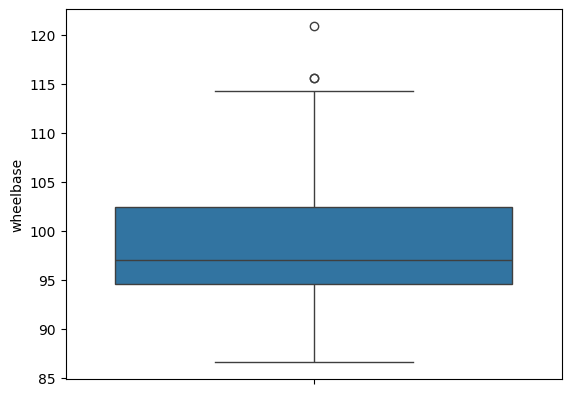

In [31]:
sns.boxplot(df['wheelbase'])

In [32]:
Q3 = df.wheelbase.quantile(0.75)
Q1 = df.wheelbase.quantile(0.25)
IQR = Q3-Q1
Upper_limit = Q3+1.5*IQR
Upper_limit

114.25000000000001

In [33]:
df['wheelbase']=np.where(df['wheelbase']>Upper_limit,114.25,df['wheelbase'])

<Axes: ylabel='wheelbase'>

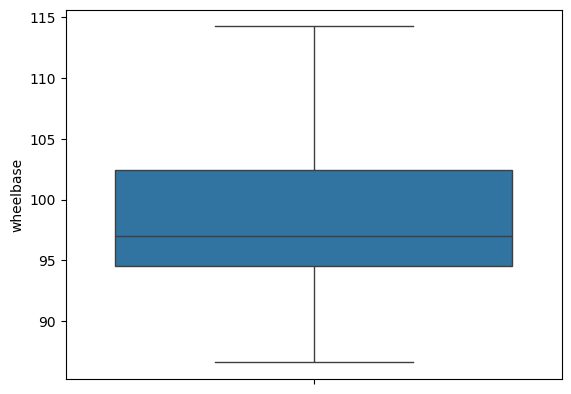

In [34]:
sns.boxplot(df['wheelbase'])

<Axes: ylabel='horsepower'>

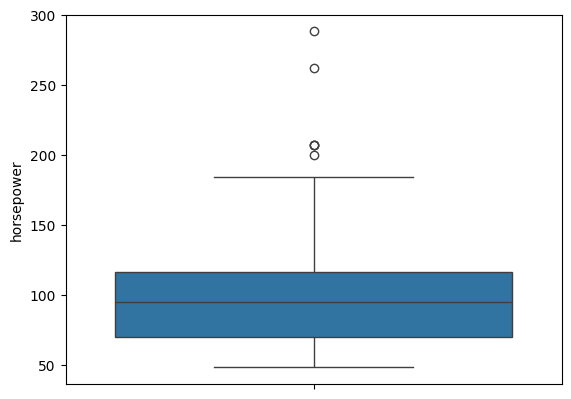

In [35]:
sns.boxplot(df['horsepower'])

In [36]:
Q3 = df.horsepower.quantile(0.75)
Q1 = df.horsepower.quantile(0.25)
IQR = Q3-Q1
Upper_limit = Q3+1.5*IQR
Upper_limit

185.0

In [ ]:
df['horsepower']=np.where(df['horsepower']>Upper_limit,185.0,df['horsepower'])


<Axes: ylabel='horsepower'>

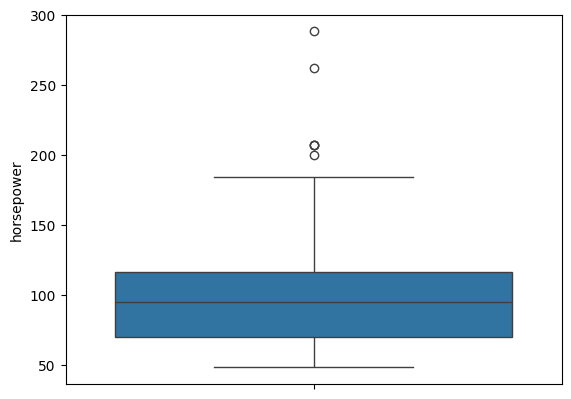

In [37]:
sns.boxplot(df['horsepower'])

**6.Visualization**

#Univariate Analysis

<Axes: ylabel='wheelbase'>

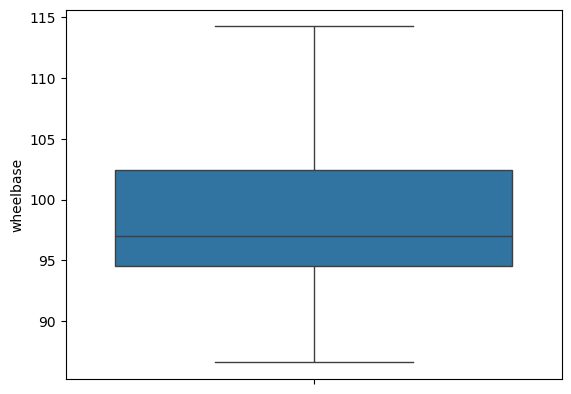

In [40]:
sns.boxplot(df['wheelbase'])

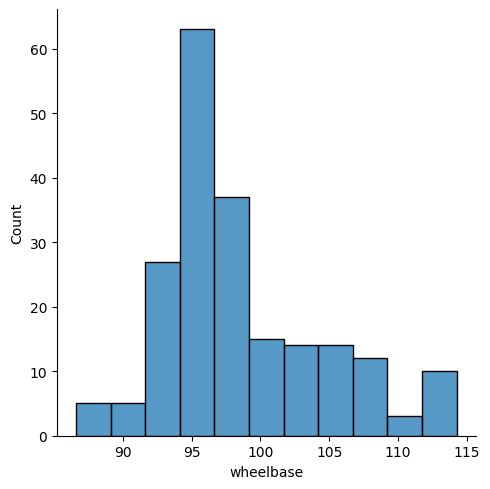

In [41]:
sns.displot(df['wheelbase'])

<ipython-input-42-ec83d2d6e122>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wheelbase'])


<Axes: xlabel='wheelbase', ylabel='Density'>

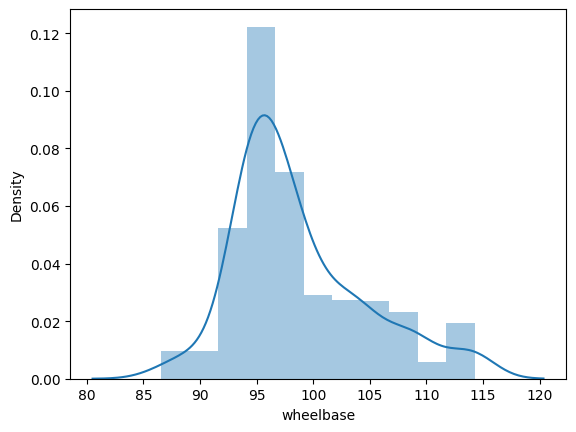

In [42]:
sns.distplot(df['wheelbase'])

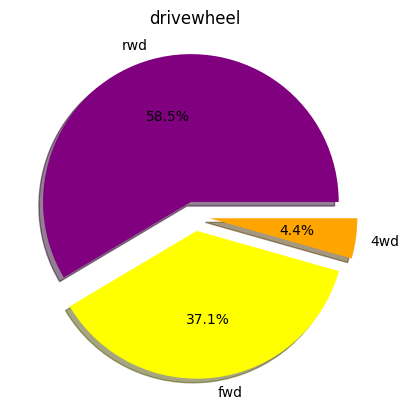

In [43]:
plt.pie(df['drivewheel'].value_counts(),[0.1,0.1,0.1],labels =['rwd','fwd','4wd'], autopct = '%1.1f%%',colors=['purple','yellow','orange'],shadow = True)
plt.title('drivewheel')
plt.show()

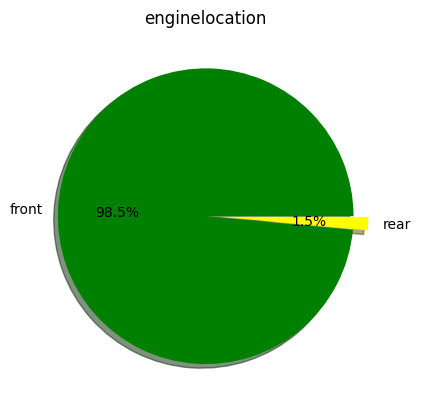

In [44]:
plt.pie(df['enginelocation'].value_counts(),[0,0.1],labels =['front','rear'], autopct = '%1.1f%%',colors=['green','yellow'],shadow= True)
plt.title('enginelocation')
plt.show()

<ipython-input-45-54fee7d3c222>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['symboling'].value_counts().index,y=df['symboling'].value_counts(),palette='husl')


<Axes: xlabel='symboling', ylabel='count'>

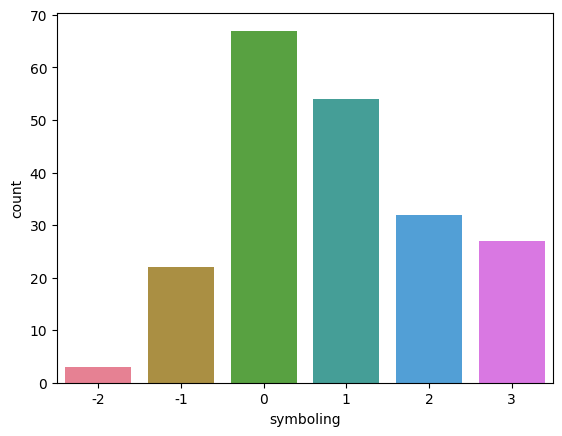

In [45]:
sns.barplot(x=df['symboling'].value_counts().index,y=df['symboling'].value_counts(),palette='husl')

#Bivariate Analaysis

<ipython-input-46-d0cb91bbab12>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df['symboling'],y = df['wheelbase'], palette ='Set1', data =df)


<Axes: xlabel='symboling', ylabel='wheelbase'>

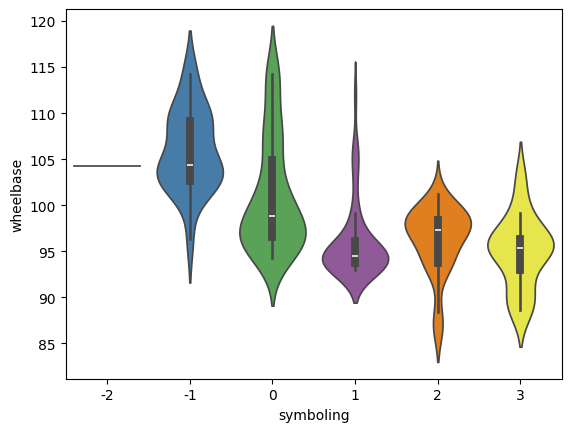

In [46]:
sns.violinplot(x = df['symboling'],y = df['wheelbase'], palette ='Set1', data =df)

<ipython-input-47-11914c780593>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='symboling', y = 'wheelbase',kind = 'box', data=df, palette='flare')


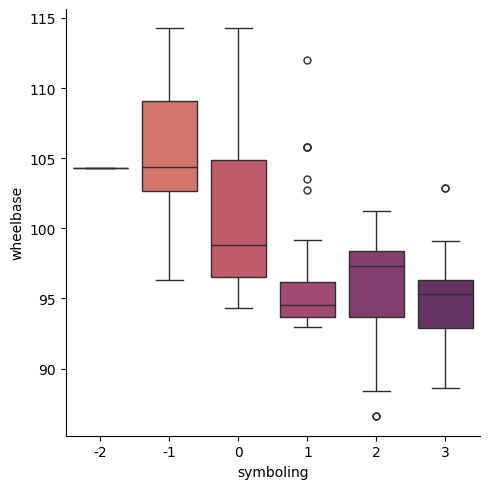

In [47]:
sns.catplot(x='symboling', y = 'wheelbase',kind = 'box', data=df, palette='flare')

<Axes: xlabel='symboling', ylabel='price'>

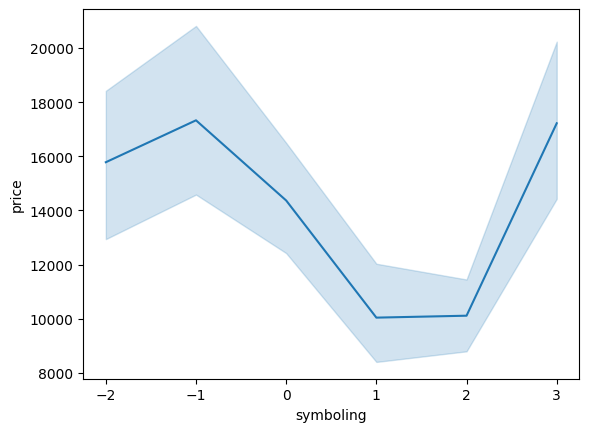

In [48]:
sns.lineplot(x=df.symboling,y=df.price)

#Multivariate Analysis

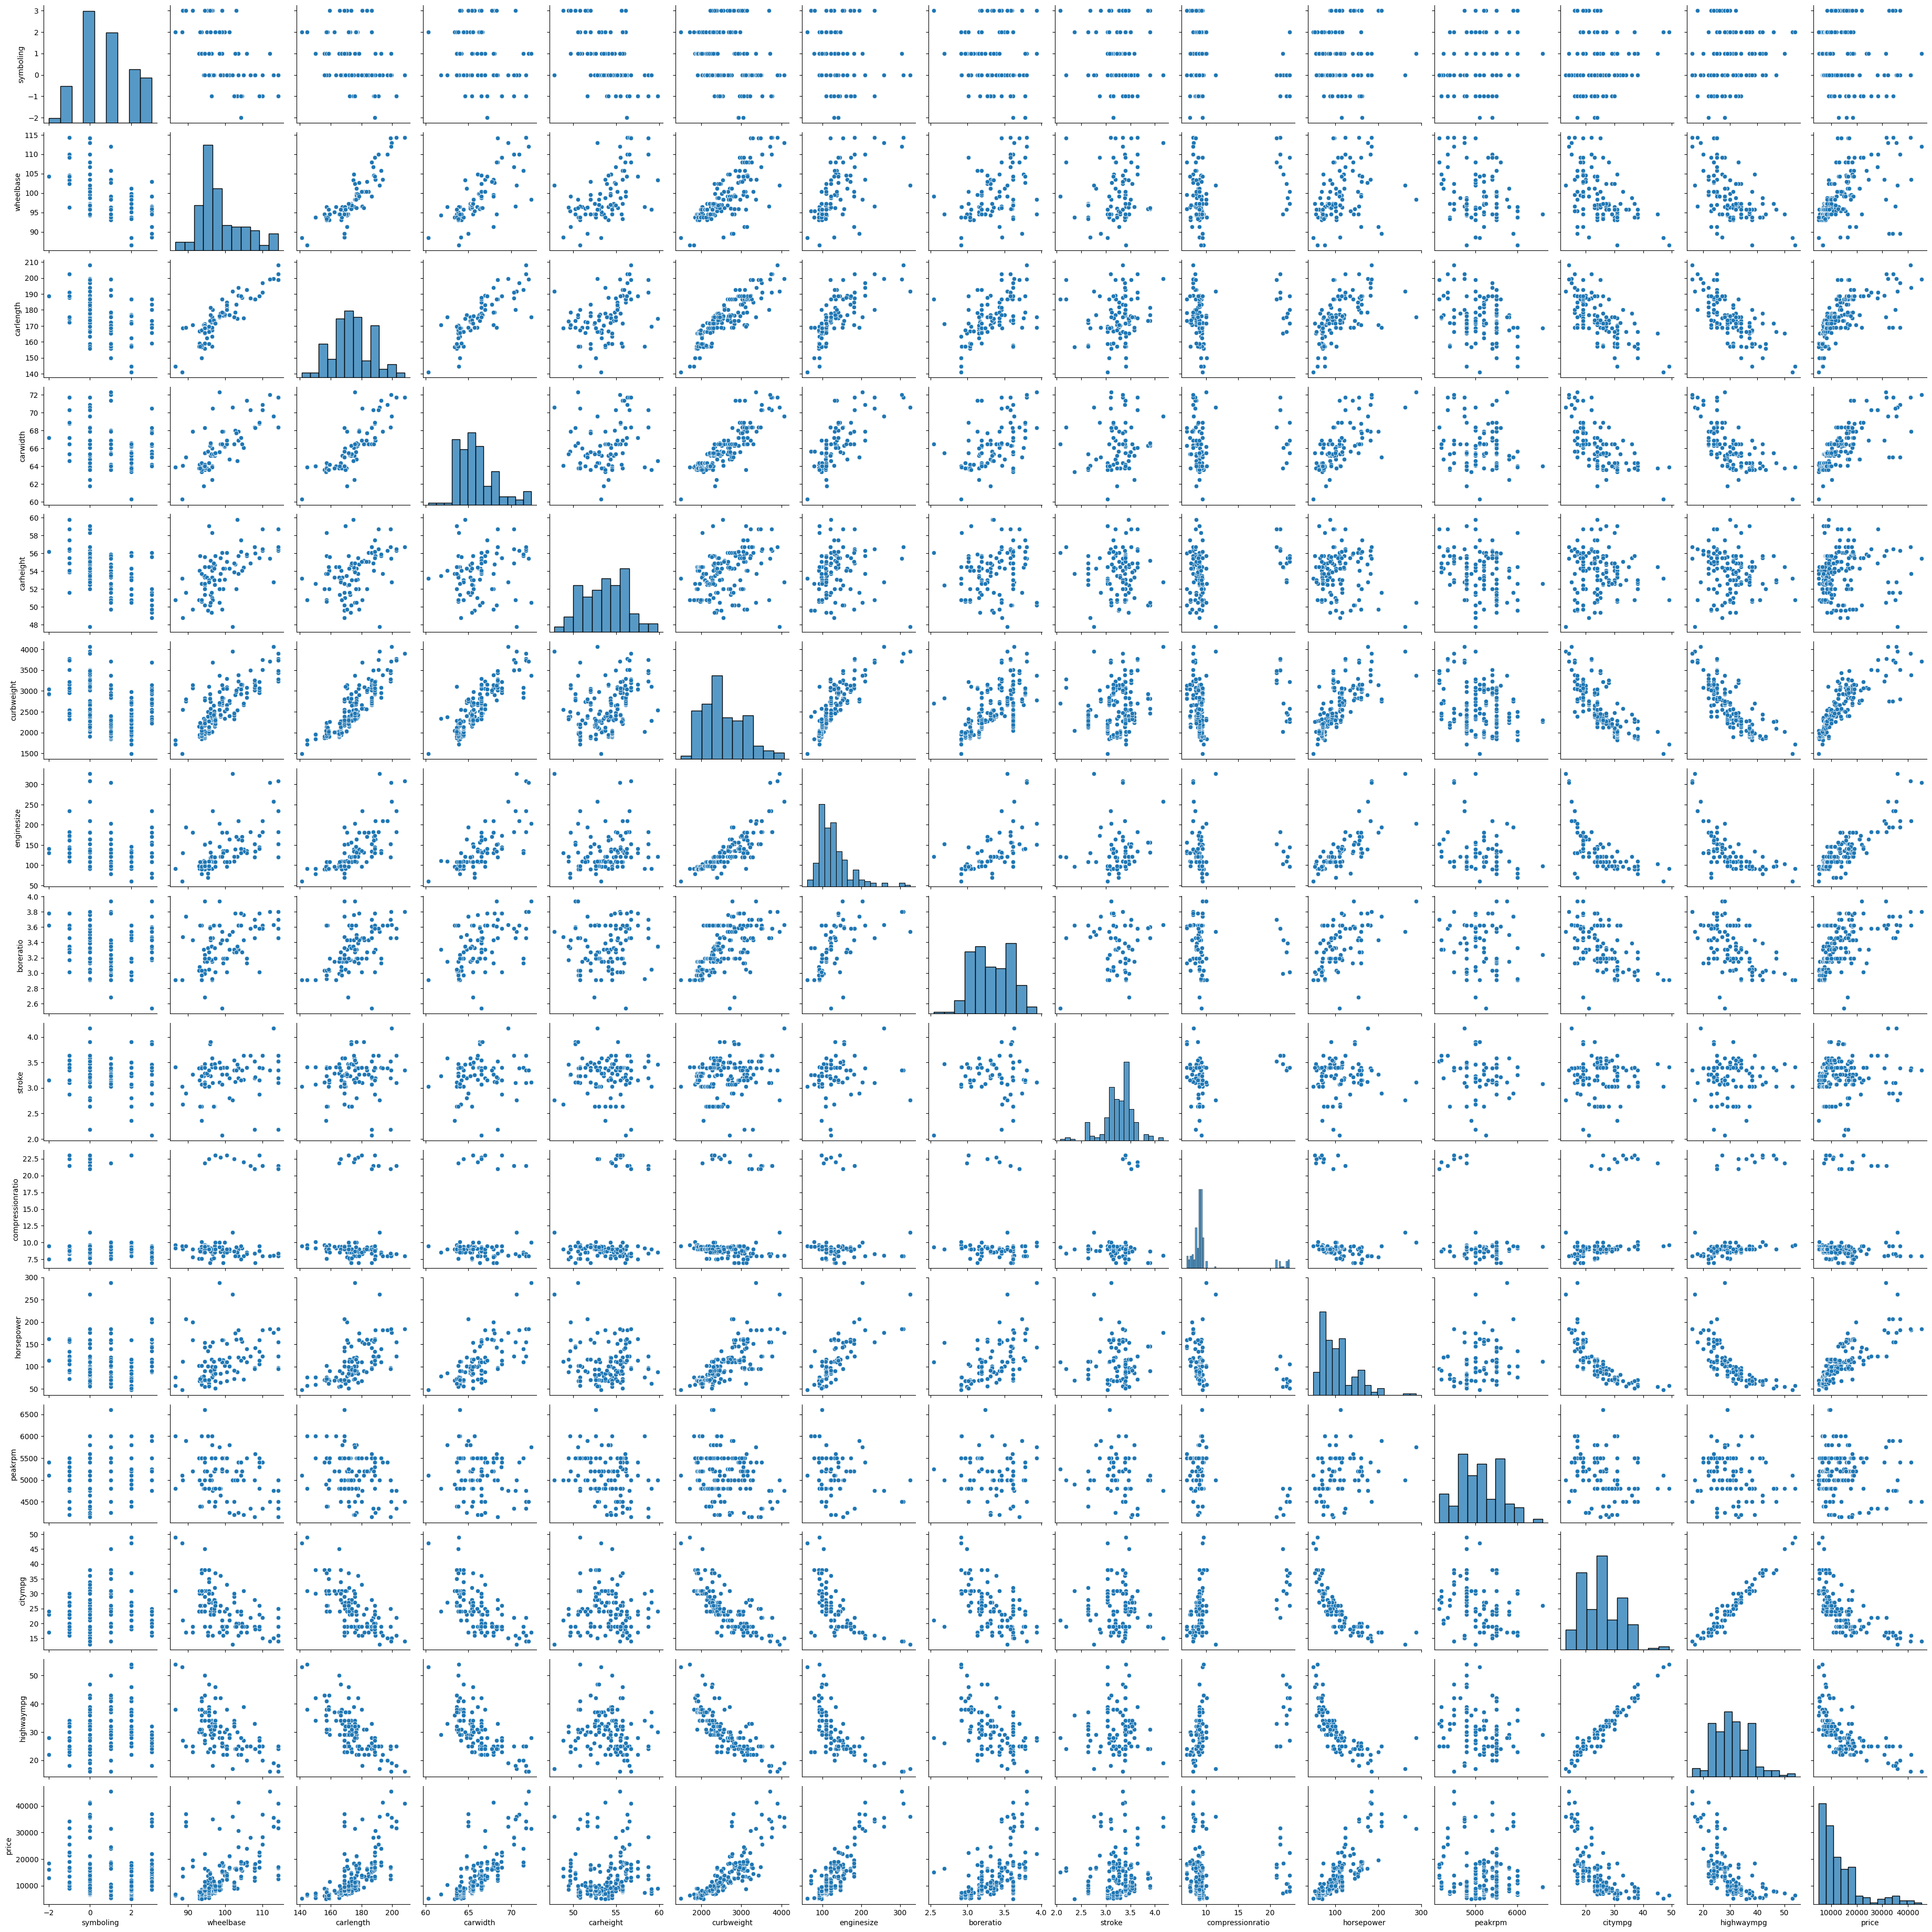

In [49]:
sns.pairplot(df)

**7.Transformation**

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [52]:
df['CarName'] = le.fit_transform(df['CarName'])
df['fueltype'] = le.fit_transform(df['fueltype'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

In [54]:
df.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.537515,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.025977,0.053016,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.314415,-0.212679,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.264436,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.451066,-0.398568,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.407364,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.461193,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.191286,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.537515,0.025977,-0.314415,0.264436,-0.451066,0.407364,0.461193,-0.191286,1.000000,0.874780,...,0.554293,0.388060,0.489113,0.162274,0.255990,0.348475,-0.359023,-0.469902,-0.542063,0.566761
carlength,-0.357612,0.053016,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874780,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


<Axes: >

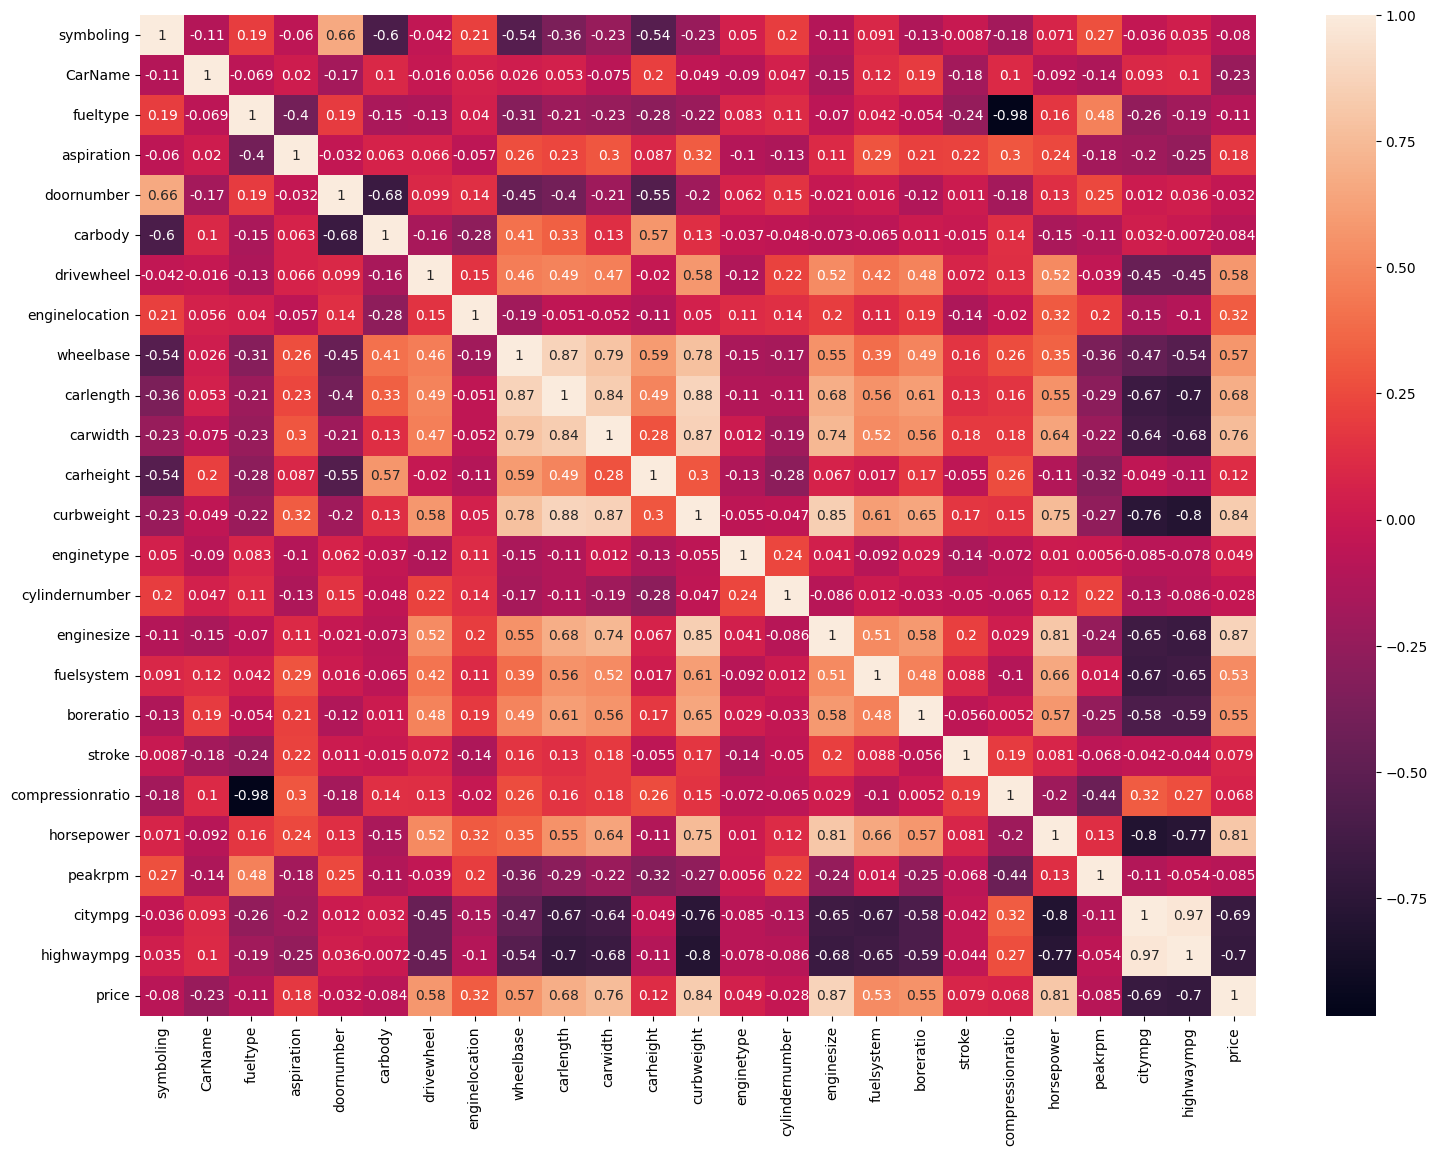

In [55]:
plt.figure(figsize =(18,13))
sns.heatmap(df.corr(), annot =True)

In [56]:
df.corr()['price'].sort_values(ascending= False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel,0.577992
wheelbase,0.566761
boreratio,0.553173
fuelsystem,0.526823


**8.X and Y Split**

In [57]:
x=df.iloc[:,:-1]
x.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [58]:
y=df.price
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [59]:
x1 = df.loc[:, ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carwidth','carlength', 'drivewheel', 'wheelbase', 'boreratio', 'fuelsystem']]
x1.head()

,enginesize,curbweight,horsepower,carwidth,carwidth,carlength,drivewheel,wheelbase,boreratio,fuelsystem
0,130,2548,111,64.1,64.1,168.8,2,88.6,3.47,5
1,130,2548,111,64.1,64.1,168.8,2,88.6,3.47,5
2,152,2823,154,65.5,65.5,171.2,2,94.5,2.68,5
3,109,2337,102,66.2,66.2,176.6,1,99.8,3.19,5
4,136,2824,115,66.4,66.4,176.6,0,99.4,3.19,5


In [60]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [61]:
scaled_x = pd.DataFrame(sc.fit_transform(x1),columns = x1.columns)
scaled_x.head()

,enginesize,curbweight,horsepower,carwidth,carwidth,carlength,drivewheel,wheelbase,boreratio,fuelsystem
0,0.260377,0.411171,0.262500,0.316667,0.316667,0.413433,1.0,0.072333,0.664286,0.714286
1,0.260377,0.411171,0.262500,0.316667,0.316667,0.413433,1.0,0.072333,0.664286,0.714286
2,0.343396,0.517843,0.441667,0.433333,0.433333,0.449254,1.0,0.285714,0.100000,0.714286
3,0.181132,0.329325,0.225000,0.491667,0.491667,0.529851,0.5,0.477396,0.464286,0.714286
4,0.283019,0.518231,0.279167,0.508333,0.508333,0.529851,0.0,0.462929,0.464286,0.714286


**9.Perform Train test split**

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(scaled_x,y,test_size =0.2,random_state = 0)


In [63]:
x_train.head()

,enginesize,curbweight,horsepower,carwidth,carwidth,carlength,drivewheel,wheelbase,boreratio,fuelsystem
4,0.283019,0.518231,0.279167,0.508333,0.508333,0.529851,0.0,0.462929,0.464286,0.714286
71,0.652830,0.873545,0.445833,0.950000,0.950000,0.917910,1.0,1.000000,0.657143,0.714286
134,0.226415,0.472847,0.258333,0.516667,0.516667,0.679104,0.5,0.452080,0.000000,0.714286
145,0.177358,0.396431,0.262500,0.425000,0.425000,0.461194,0.0,0.376130,0.771429,0.714286
122,0.139623,0.272692,0.083333,0.291667,0.291667,0.391045,0.5,0.256781,0.307143,0.142857


In [64]:
y_train.head()

,price
4,17450.0
71,34184.0
134,15040.0
145,11259.0
122,7609.0


In [65]:
x_train.shape

(164, 10)

In [66]:
x_test.shape

(41, 10)

**10.Train the data with suitable ML model**

In [67]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

**11.Test the model**

In [68]:
x_test.head()

,enginesize,curbweight,horsepower,carwidth,carwidth,carlength,drivewheel,wheelbase,boreratio,fuelsystem
52,0.113208,0.161753,0.083333,0.325000,0.325000,0.268657,0.5,0.235081,0.350000,0.142857
181,0.377358,0.645074,0.450000,0.516667,0.516667,0.697015,1.0,0.647378,0.521429,0.714286
5,0.283019,0.395268,0.258333,0.500000,0.500000,0.540299,0.5,0.477396,0.464286,0.714286
18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.065099,0.264286,0.142857
188,0.181132,0.314973,0.216667,0.433333,0.433333,0.456716,0.5,0.386980,0.464286,0.714286


In [69]:
y_test.head()

,price
52,6795.0
181,15750.0
5,15250.0
18,5151.0
188,9995.0


In [70]:
y_pred=lr.predict(x_test)
y_pred

array([ 6457.0646996 , 20875.04579244, 13441.09609135,  -564.33425425,
       10116.27237288, 15730.68126193,  6771.16663316,  4423.71112611,
       24766.59127981,  7273.44125621, 16664.41840456, 36865.80505245,
       10630.17404438, 12955.29110455,  5841.36063446, 15376.61441474,
       12413.68444496, 18591.40585931, 10183.05739826,  5631.73621475,
       11108.33061174, 15626.4765732 , 12207.35522468, 15827.49641546,
       22733.52388188,  5712.72205668,  7149.23936385, 15451.90628662,
        7262.65140084,  6137.93644897,  9005.5828957 , 11027.54211511,
       20367.23642805, 10751.1929272 ,  6273.47766391, 26978.79215322,
        8611.4002185 , 15876.07569775,  5977.00758104, 36742.60304831,
        5744.54548093])

In [71]:
y_pred1=lr.predict(x_train)
y_pred1

array([12848.09862652, 30535.11666363, 14110.09750617,  8713.89254241,
        7300.94147035,  6289.58221958, 17566.27621522,  9101.12488832,
        9188.14861378, 20432.31932591,  5865.92682238,  9034.51841265,
       11585.06021895, 20856.04718342, 24057.61371555, 10165.86288798,
       19084.22141639,  9143.76234892,  6228.72698022,  6318.85795462,
       12874.53474223,  8039.96092674, 11654.21390004, 10630.17404438,
       20154.16568691, 11223.22738747,  5744.54548093,  6691.95186593,
        6514.49007899,  6461.10982868,  7170.70666072,  6443.23396338,
        7025.86644035,  8785.86844152, 18298.47269612,  6364.76052295,
       15588.86781853,  9198.29539331, 18035.38569774, 22622.87799213,
       19209.30196659,  8363.67384551, 18146.33459772,  9013.88133743,
       24559.80792565, 12382.86313533, 14331.56500366, 17612.05647678,
        7312.44205123, 11654.21390004, 20348.0255639 , 11585.06021895,
       10088.75056027, 19176.36479659,  8634.88292352, 10748.95711141,
      

**12.Evaluating the model**

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,classification_report

In [73]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 16442239.112275293
Root Mean Squared Error: 16442239.112275293
R-squared: 0.7876128574133496


**13.Test with Random values**

In [74]:
lr.predict([[0.222830,0.2,0.45,0.50,0.3616,0.69,1.0,0.87,0.65,0.99]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12778.14100726])

In [75]:
lr.predict([[0.652830,0.5,0.48,0.50,0.2916,0.679,0.5,0.452,0.65,0.71]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22118.86774482])